# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [Online_Retail.csv](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv) from the folder.

In [4]:
online_rt = pd.read_csv('D:/Analytixlabs Data/Module 5 - Python/OnlineRetail.csv',encoding= 'unicode_escape')

### Step 3. Assign it to a variable called online_rt

In [7]:
online_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

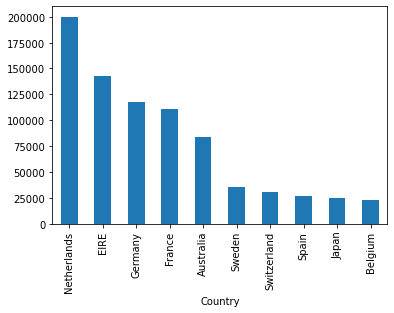

In [24]:
coun_quan=online_rt.groupby('Country')['Quantity'].sum()
coun_quan.sort_values(ascending=False)[1:11].plot(kind='bar')

### Step 5.  Exclude negative Quatity entries

In [27]:
online_rt=online_rt[online_rt.Quantity>0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

In [34]:
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-10 8:26,3.39,17850.0,United Kingdom


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
top3coun=coun_quan.sort_values(ascending=False)[1:4].index.to_list()
top3coun

['Netherlands', 'EIRE', 'Germany']

In [64]:
x=online_rt.groupby(['CustomerID','Country'])['UnitPrice','Quantity'].sum()
x['Country'] = x.index.get_level_values(1)
x


<ipython-input-64-3123cf692350>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x=online_rt.groupby(['CustomerID','Country'])['UnitPrice','Quantity'].sum()


,,UnitPrice,Quantity,Country
CustomerID,Country,,,
12346.0,United Kingdom,1.04,74215,United Kingdom
12347.0,Iceland,481.21,2458,Iceland
12348.0,Finland,178.71,2341,Finland
12349.0,Italy,605.10,631,Italy
12350.0,Norway,65.30,197,Norway
...,...,...,...,...
18280.0,United Kingdom,47.65,45,United Kingdom
18281.0,United Kingdom,39.36,54,United Kingdom
18282.0,United Kingdom,62.39,103,United Kingdom


In [70]:
x=x[x['Country'].isin(top3coun)]
x

,,UnitPrice,Quantity,Country
CustomerID,Country,,,
12426.0,Germany,118.09,258,Germany
12427.0,Germany,142.26,533,Germany
12468.0,Germany,133.57,366,Germany
12471.0,Germany,1978.17,8212,Germany
12472.0,Germany,812.81,4148,Germany
...,...,...,...,...
14016.0,EIRE,635.88,2125,EIRE
14156.0,EIRE,5357.68,57885,EIRE
14335.0,Germany,144.24,379,Germany


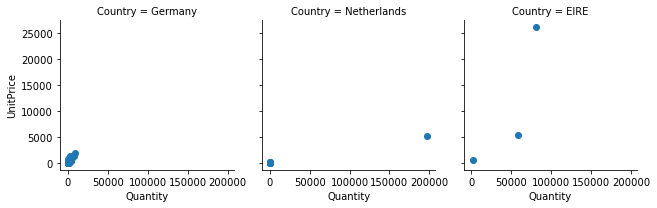

In [76]:
g=sns.FacetGrid(data=x,col='Country')
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)
g.add_legend()